In [0]:
#import all library of the fastai
from fastai import*

In [0]:
#import vision library from the fastai
from fastai.vision import*

In [4]:
#download the camvid data sets
path=untar_data(URLs.CAMVID)

In [5]:
#print the path of data
path

PosixPath('/root/.fastai/data/camvid')

In [0]:

!mv '/root/.fastai/data/camvid' '.'

In [0]:
#path of camvid datasets
path=Path('camvid')

In [0]:
#store the labels in path_labels subfolder
path_labels=path/'labels'

In [0]:
#store the images in the  path_images subfolder
path_images=path/'images'

In [0]:
#found the imges from path_images subfolder
fname=get_image_files(path_images)

In [0]:
#found the labels from path_labels subfolder
lbname=get_image_files(path_labels)

In [0]:
#open a image from the data
img=open_image(fname[1])

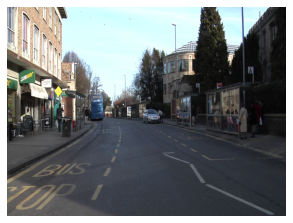

In [13]:
#show the images
img.show(figsize=(5,5))

In [0]:
#mapping the function
get_label_name_from_image = lambda x: path_labels/f'{x.stem}_P{x.suffix}'

In [0]:
#store a images in the img
img=fname[1]

In [0]:
#create a mask on the images
mask = open_mask(get_label_name_from_image(fname[1]))

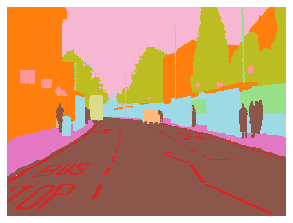

In [17]:
#show the mask
mask.show(figsize=(5,5),alpha=1)

In [0]:
#size of images
src_size = np.array(mask.shape[1:])


In [19]:
#display the size of the images
src_size

array([720, 960])

In [20]:
#display the tensor/picture pixel in the form of the array
mask.data

tensor([[[ 4,  4,  4,  ..., 26, 26, 26],
         [ 4,  4,  4,  ..., 26, 26, 26],
         [ 4,  4,  4,  ..., 26, 26, 26],
         ...,
         [17, 17, 17,  ..., 17, 17, 17],
         [17, 17, 17,  ..., 17, 17, 17],
         [17, 17, 17,  ..., 17, 17, 17]]])

In [0]:
#load the data of their classes
codes=np.loadtxt(path/'codes.txt',dtype=str)

In [22]:
#display the classes
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [23]:
size = src_size//2

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

NameError: ignored

In [0]:
#create the databunches
src = (SegmentationItemList.from_folder(path_images)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_label_name_from_image, classes=codes))

In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True).databunch(bs=8).normalize(imagenet_stats))

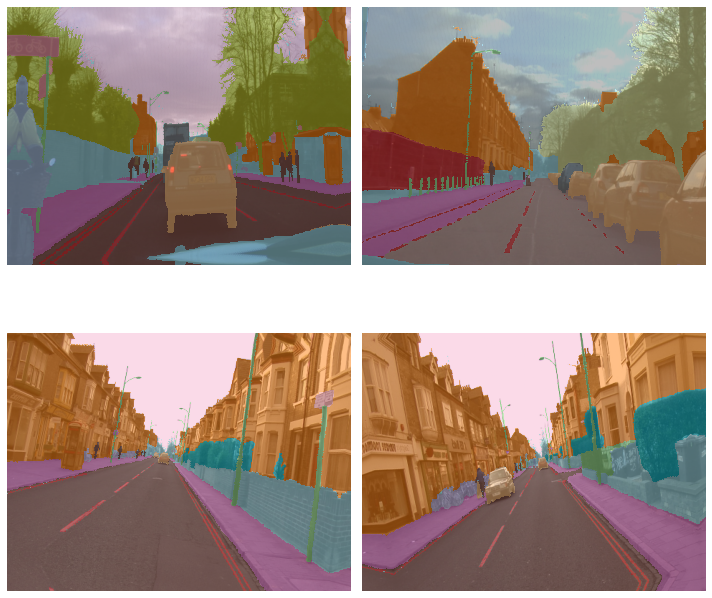

In [27]:
#show the data bunches
data.show_batch(rows=2, figsize=(10, 10))

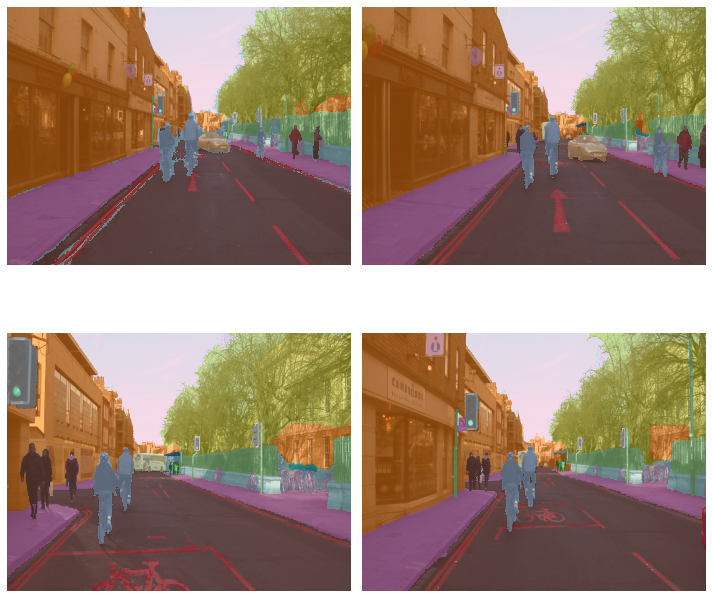

In [28]:
data.show_batch(2, figsize=(10, 10), ds_type=DatasetType.Valid)

In [29]:
#create a model
model= unet_learner(data, models.resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [30]:
#train the models
model.fit_one_cycle(3)

epoch,train_loss,valid_loss,time
0,1.967000,1.796815,01:02
1,1.459874,1.097959,00:54
2,0.968646,0.721985,00:55


In [31]:
 #find the learning rate 
 model.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


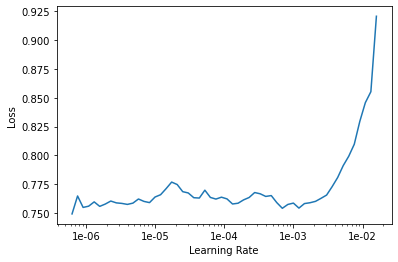

In [33]:
#plot the learning rate 
model.recorder.plot()

In [35]:
#analyse the lr value and train the data 
lr=1e-03
model.fit_one_cycle(10,slice(lr))

epoch,train_loss,valid_loss,time
0,0.609093,0.533317,00:54
1,0.605085,0.517599,00:54
2,0.606763,0.544315,00:54
3,0.555657,0.423864,00:54
4,0.503815,0.396459,00:54
5,0.472348,0.374020,00:54
6,0.435691,0.362491,00:54
7,0.404982,0.330310,00:55
8,0.384621,0.324770,00:54
9,0.368970,0.320804,00:55


In [0]:
save the model
model.save('68%_accuracy')

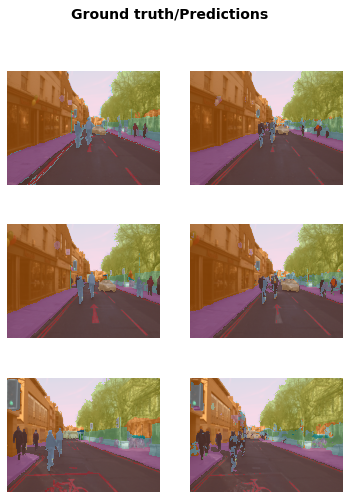

In [37]:
#show the result 
model.show_results(rows=3,figsize=(6,8))

In [0]:
#unfreeze the model
model.unfreeze()

for increase the accuracy then we have train again and again our models for thier different learnng rate

In [40]:
model.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


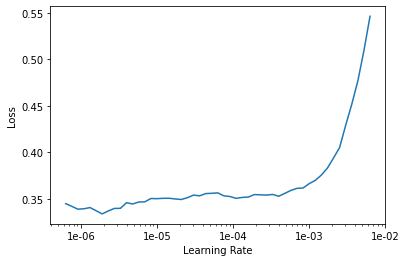

In [41]:
model.recorder.plot()

In [0]:
lrs=slice(lr/550,lr/6)

In [43]:
model.fit_one_cycle(12,slice(lr))

epoch,train_loss,valid_loss,time
0,0.368842,0.320651,00:54
1,0.383685,0.357478,00:55
2,0.416881,0.365250,00:55
3,0.418478,0.357798,00:55
4,0.400376,0.360692,00:55
5,0.364206,0.332954,00:55
6,0.336428,0.336649,00:55
7,0.314867,0.328639,00:55
8,0.295725,0.295756,00:55
9,0.274961,0.291109,00:54


In [0]:
model.save("72%_accuracy")

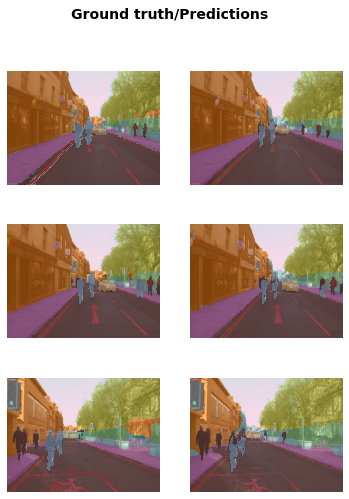

In [46]:
model.show_results(rows=3,figsize=(6,8))

In [0]:
model.unfreeze()

In [49]:
model.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


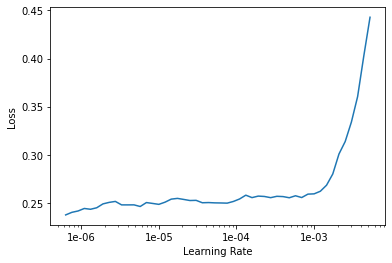

In [50]:
model.recorder.plot()

In [0]:
lr1=slice(lr/45,lr/4)

In [56]:
model.fit_one_cycle(12,lr1)

epoch,train_loss,valid_loss,time
0,0.251698,0.287307,00:55
1,0.253988,0.299503,00:55
2,0.260891,0.297504,00:55
3,0.263428,0.298090,00:55
4,0.257628,0.286949,00:55
5,0.247961,0.269150,00:55
6,0.237283,0.289079,00:55
7,0.233443,0.272368,00:55
8,0.227957,0.267444,00:55
9,0.219252,0.268975,00:55


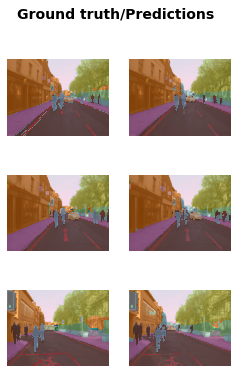

In [58]:
model.show_results(rows=3,figsize=(4,6))